# Import Library

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA

# Convert CSV Files to Dataframe

In [298]:
df_customer = pd.read_csv('Case Study - Customer.csv', delimiter= ';')
df_product = pd.read_csv('Case Study - Product.csv', delimiter= ';')
df_store = pd.read_csv('Case Study - Store.csv', delimiter= ';')
df_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter= ';')

In [299]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [300]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [301]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [302]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


# Data Cleansing

In [303]:
#Detecting the Missing Value
df_customer.isnull()

,CustomerID,Age,Gender,Marital Status,Income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
442,False,False,False,True,False
443,False,False,False,False,False
444,False,False,False,False,False
445,False,False,False,False,False


In [304]:
#Detecting the Missing Value
df_product.isnull()

,ProductID,Product Name,Price
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [305]:
#Detecting the Missing Value
df_store.isnull()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [306]:
#Detecting the Missing Value
df_transaction.isnull()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5015,False,False,False,False,False,False,False,False
5016,False,False,False,False,False,False,False,False
5017,False,False,False,False,False,False,False,False
5018,False,False,False,False,False,False,False,False


In [307]:
# Memeriksa apakah ada nilai yang hilang di setiap kolom DataFrame df_customer
missing_values1 = df_customer.isnull().any()
missing_values2 = df_product.isnull().any()
missing_values3 = df_store.isnull().any()
missing_values4 = df_transaction.isnull().any()

# Menampilkan kolom-kolom dengan nilai yang hilang (jika ada)
print('Customer')
print(missing_values1)

print('\nProduct')
print(missing_values2)

print('\nStore')
print(missing_values3)

print('\nTransaction')
print(missing_values4)

Customer
CustomerID        False
Age               False
Gender            False
Marital Status     True
Income            False
dtype: bool

Product
ProductID       False
Product Name    False
Price           False
dtype: bool

Store
StoreID       False
StoreName     False
GroupStore    False
Type          False
Latitude      False
Longitude     False
dtype: bool

Transaction
TransactionID    False
CustomerID       False
Date             False
ProductID        False
Price            False
Qty              False
TotalAmount      False
StoreID          False
dtype: bool


In [308]:
# Memeriksa apakah ada nilai yang hilang di setiap kolom DataFrame df_customer
missing_values1 = df_customer.isnull().sum()
missing_values2 = df_product.isnull().sum()
missing_values3 = df_store.isnull().sum()
missing_values4 = df_transaction.isnull().sum()

# Menampilkan kolom-kolom dengan nilai yang hilang (jika ada)
print('Customer', missing_values1)
print('\nProduct', missing_values2)
print('\nStore', missing_values3)
print('\nTransaction', missing_values4)

Customer CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

Product ProductID       0
Product Name    0
Price           0
dtype: int64

Store StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

Transaction TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


In [309]:
# Mengatasi Missing Value Customer (Marital Status)
df_customer['Marital Status'].fillna('No Status', inplace=True)
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [310]:
# Mengecek data duplikat
duplicate_rows1 = df_customer[df_customer.duplicated()]
duplicate_rows2 = df_product[df_product.duplicated()]
duplicate_rows3 = df_store[df_store.duplicated()]
duplicate_rows4 = df_transaction[df_transaction.duplicated()]

# Menampilkan baris data yang duplikat
print("Data Duplikat Customer:", duplicate_rows1)
print("\nData Duplikat Product:", duplicate_rows2)
print("\nData Duplikat Store:", duplicate_rows2)
print("\nData Duplikat Transaction:", duplicate_rows2)

Data Duplikat Customer: Empty DataFrame
Columns: [CustomerID, Age, Gender, Marital Status, Income]
Index: []

Data Duplikat Product: Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []

Data Duplikat Store: Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []

Data Duplikat Transaction: Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []


In [311]:
# Data cleansing in df_customer
df_customer['Income'] = df_customer['Income'].replace('[,]', '.', regex=True).astype('float')

In [312]:
# Data cleansing in df_store
df_store['Latitude'] = df_store['Latitude'].replace('[,]', '.', regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]', '.', regex=True).astype('float')

In [313]:
# Data cleansing for the "Date" column in df_transaction
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [314]:
df_transaction['TransactionID'].value_counts()

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64

In [315]:
df_transaction [df_transaction['TransactionID'] == 'TR71313' ]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


# Data Merge

In [316]:
df_merge1 = pd.merge(df_customer, df_transaction, on='CustomerID')
df_merge2 = pd.merge(df_merge1, df_product.drop(columns=['Price']), on='ProductID')
df_merge3 = pd.merge(df_merge2, df_store, on='StoreID')

In [317]:
df_merge3.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [318]:
df_merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      5020 non-null   int64         
 1   Age             5020 non-null   int64         
 2   Gender          5020 non-null   int64         
 3   Marital Status  5020 non-null   object        
 4   Income          5020 non-null   float64       
 5   TransactionID   5020 non-null   object        
 6   Date            5020 non-null   datetime64[ns]
 7   ProductID       5020 non-null   object        
 8   Price           5020 non-null   int64         
 9   Qty             5020 non-null   int64         
 10  TotalAmount     5020 non-null   int64         
 11  StoreID         5020 non-null   int64         
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [319]:
df_merge3.duplicated().sum()

0

# Machine Learning Regression (Time Series)

In [320]:
df_regression = df_merge3.groupby(['Date']).agg({'Qty':
                                                 'sum'}).reset_index()
df_regression

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


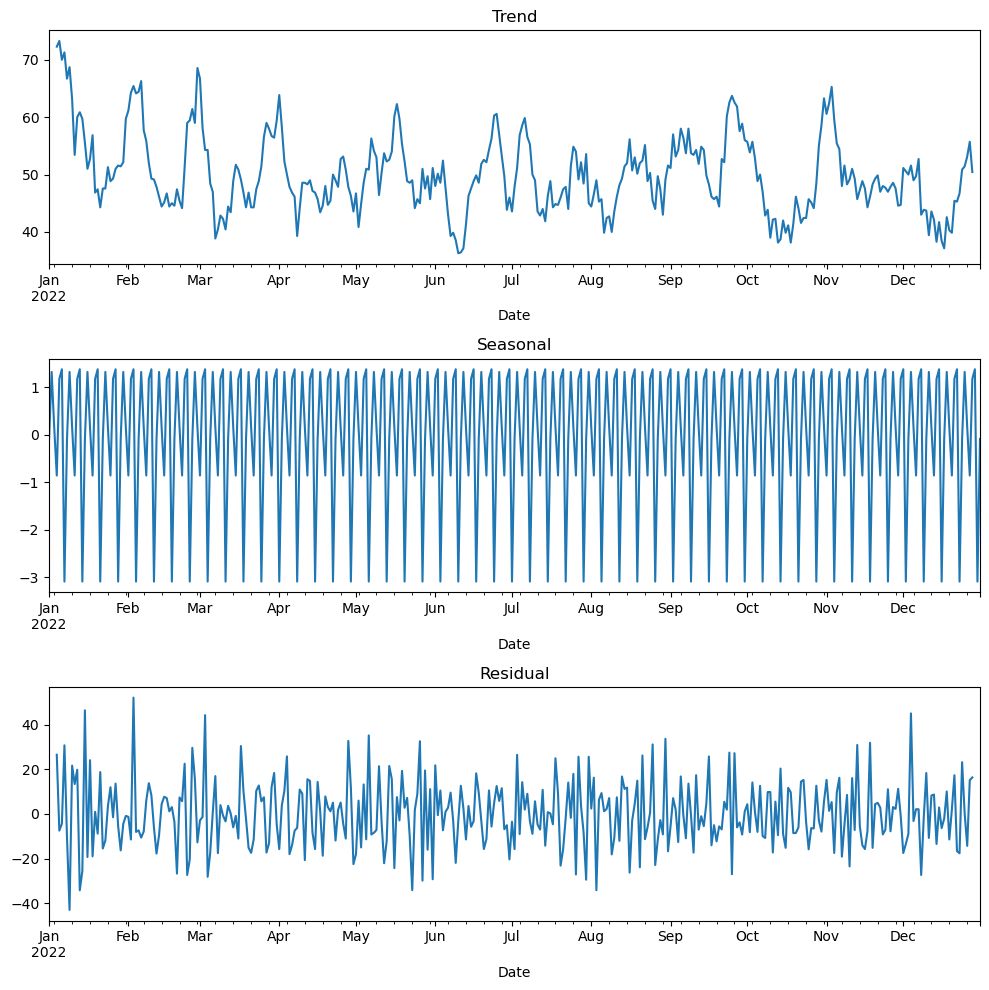

In [321]:
# Decomposition Analysis (Trend, Seasonal, Residual)
decomposed = seasonal_decompose(df_regression.set_index('Date'))

plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title("Trend")

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')

plt.tight_layout()
plt.show()

# Check Data Stationary

In [322]:
from statsmodels.tsa.stattools import adfuller

# Uji ADF pada kolom 'Qty' dari DataFrame 'df_regression'
result = adfuller(df_regression['Qty'])

# Menampilkan hasil uji ADF
print('Augmented Dickey-Fuller Test Results:')
print('ADF Statistic: %.4f' % result[0])
print('p-value: %.4f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.4f' % (key, value))

# Menyimpulkan hasil uji berdasarkan p-value
if result[1] <= 0.05:
    print('\nHasil uji menunjukkan bahwa data adalah stasioner (Reject H0)')
else:
    print('\nHasil uji menunjukkan bahwa data bukan stasioner (Fail to Reject H0)')

Augmented Dickey-Fuller Test Results:
ADF Statistic: -19.0188
p-value: 0.0000
Critical Values:
	1%: -3.4484
	5%: -2.8695
	10%: -2.5710

Hasil uji menunjukkan bahwa data adalah stasioner (Reject H0)


# Check Data Stationary

In [323]:
# Memisahkan Data
split_size = round(df_regression.shape[0] * 0.8)

df_train = df_regression.iloc[:split_size]
df_test = df_regression.iloc[split_size:].reset_index(drop=True)

df_train.shape, df_test.shape

((292, 2), (73, 2))

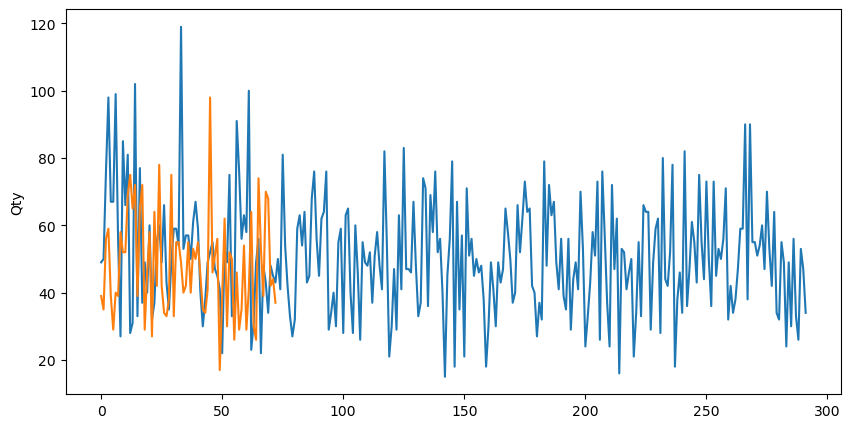

In [324]:
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.lineplot(data=df_train, x=df_train.index, y=df_train['Qty'])
sns.lineplot(data=df_test, x=df_test.index, y=df_test['Qty'])

plt.show()

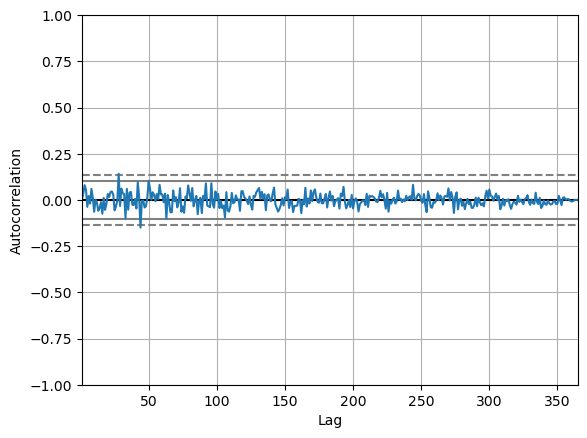

In [325]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_regression['Qty']);

#  Metode Time Series ARIMA

RMSE value: 15.472470536969373
MAE value: 12.357221854464841


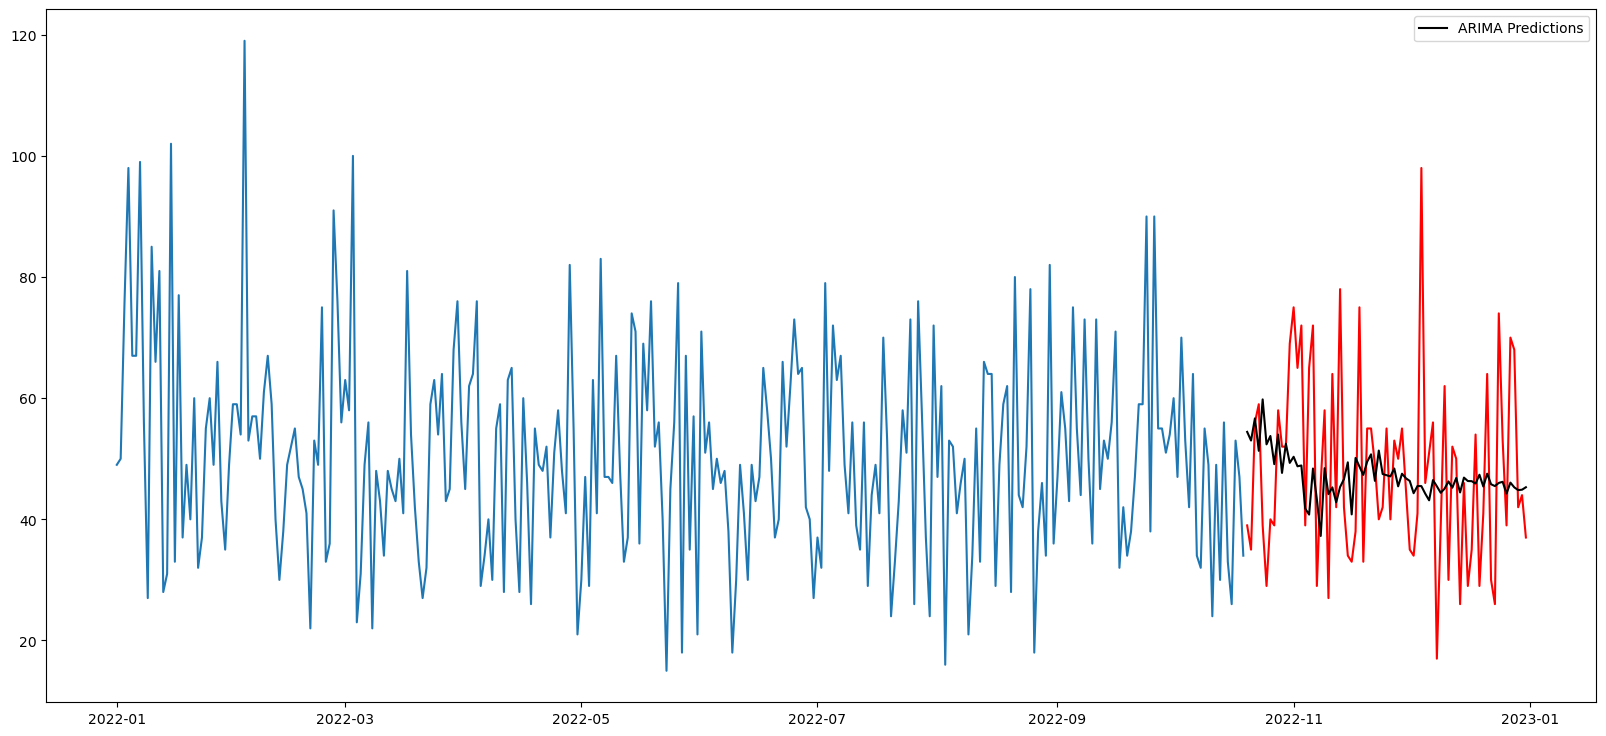

In [326]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the rase function
def rase(y_actual, y_pred):
    # Calculate RMSE
    rmse = mean_squared_error(y_actual, y_pred) ** 0.5
    print(f'RMSE value: {rmse}')

# Define the eval function
def eval(y_actual, y_pred):
    # Evaluate machine learning modeling
    rase(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    print(f'MAE value: {mae}')

# Set the index for df_train and df_test
df_train = df_train.set_index(['Date'])
df_test = df_test.set_index(['Date'])

# Perform ARIMA modeling
y = df_train['Qty']
ARIMAmodel = ARIMA(y, order=(40, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

# Make predictions
y_pred = ARIMAmodel.get_forecast(len(df_test))
y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

# Evaluate and plot the results
eval(df_test['Qty'], y_pred_out)
plt.figure(figsize=(20, 9))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.legend()
plt.show()

# Machine Learning Clustering

In [331]:
# Membuat data baru untuk clustering, yaitu groupby by customerID lalu yang di aggregasi
df_cluster = df_merge3.groupby('CustomerID').agg({'TransactionID': 'count','Qty': 'sum','TotalAmount': 'sum'}).reset_index()
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [334]:
from sklearn.preprocessing import normalize

data_cluster = df_cluster.drop(columns=['CustomerID'])
data_cluster_normalize = normalize(data_cluster)
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [341]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init=1).fit(data_cluster_normalize)
    fits.append(model)
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

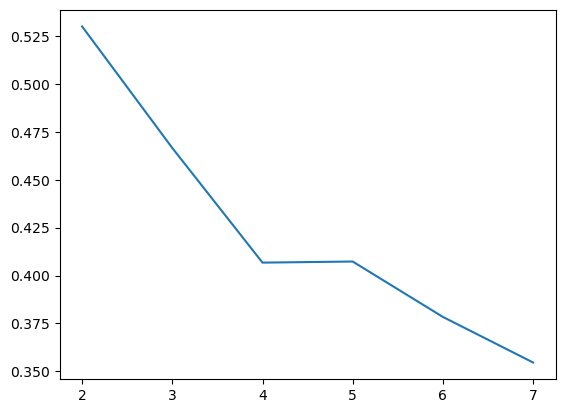

In [369]:
# Visualisasi silhouette score 
sns.lineplot(x = K, y = score);

In [380]:
fits[2]
print(fits[2])

df_cluster['cluster label'] = fits[2].labels_

# Mengelompokkan DataFrame
df_cluster.groupby(['cluster label']).agg({'CustomerID':'count',
                                           'TransactionID' : 'mean', 
                                           'Qty': 'mean',
                                           'TotalAmount' : 'mean'})

KMeans(n_clusters=4, n_init=1, random_state=0)


,CustomerID,TransactionID,Qty,TotalAmount
cluster label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926


<Figure size 300x300 with 0 Axes>

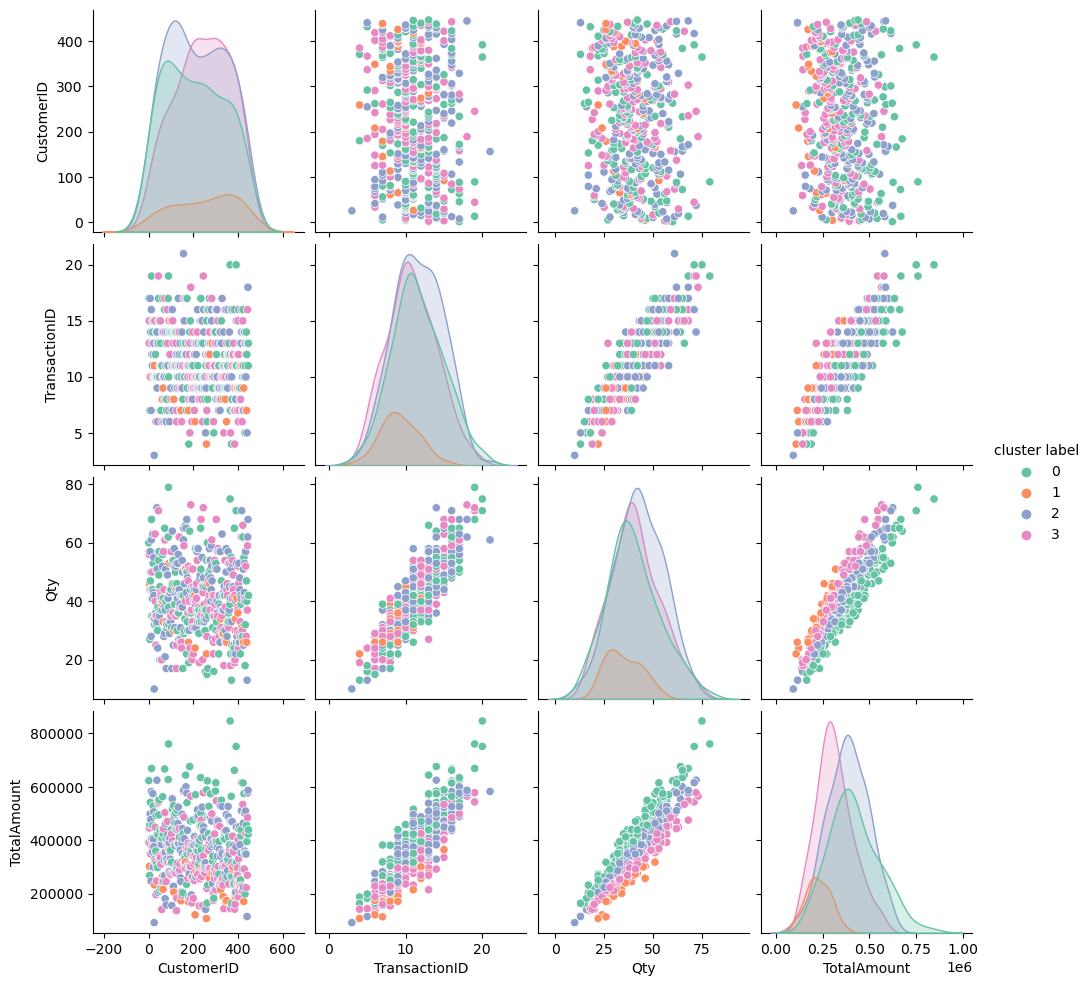

In [399]:
plt.figure(figsize=(3,3))
sns.pairplot(data=df_cluster,hue='cluster label',palette='Set2')
plt.show()